In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Step 1: Load the dataset
file_path = '/kaggle/input/svm-classification/UniversalBank.csv'  
data = pd.read_csv(file_path)


In [4]:
# Step 2: Preprocessing

# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

# Define the features (X) and target (y)
X = data.drop(columns=['Personal Loan'])  # Drop the target variable
y = data['Personal Loan']  # Target variable

# Feature scaling: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Define the SVM model with RBF kernel
svm_model = SVC(kernel='rbf')

In [8]:
# Step 5: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
    'kernel': ['rbf']  # We are using RBF kernel
}

In [9]:
# GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['rbf']})

In [10]:
# Step 6: Output the best hyperparameters found
print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [11]:
# Step 7: Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [29]:
# Step 8: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy * 100:.2f}%")


Accuracy of the SVM model: 98.30%


In [26]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_scores = cross_val_score(best_model, X_scaled, y, cv=5)

# Average cross-validation score
print(f"Cross-validation accuracy: {cross_val_scores.mean() * 100:.2f}%")


Cross-validation accuracy: 97.72%


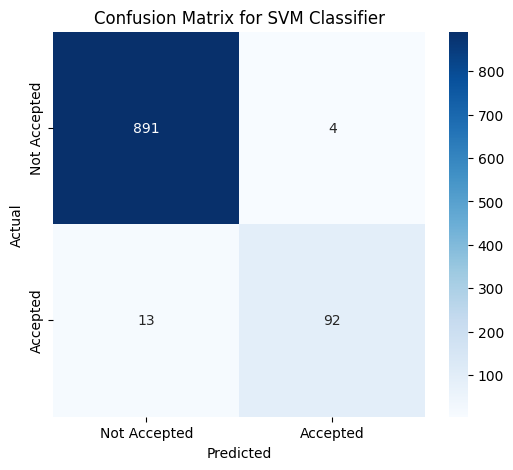

In [15]:
# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Accepted', 'Accepted'], yticklabels=['Not Accepted', 'Accepted'])
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

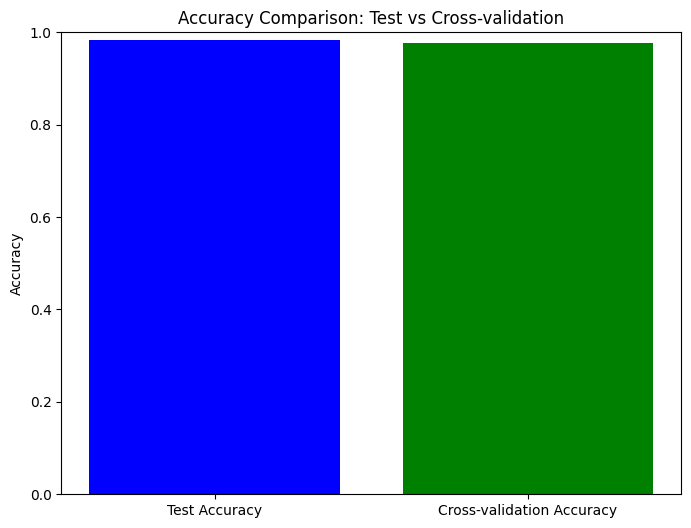

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_scores = cross_val_score(best_model, X_scaled, y, cv=5)

# Calculate the mean accuracy from cross-validation
cv_accuracy = cross_val_scores.mean()

# Calculate accuracy from the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Plotting the accuracies
labels = ['Test Accuracy', 'Cross-validation Accuracy']
accuracies = [test_accuracy, cv_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Accuracy Comparison: Test vs Cross-validation')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
